# ML and DL approaches to predict flood in an urban area<br>
By Shahryar Namdari - 10959487


### Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
from IPython.display import Image, display
import numpy as np
from scipy.stats import zscore
import plotly.express as px
from tqdm.notebook import trange, tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
from keras import layers
import keras
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model

In [2]:
Edge_Num = 191

An elavation map for our urban area:


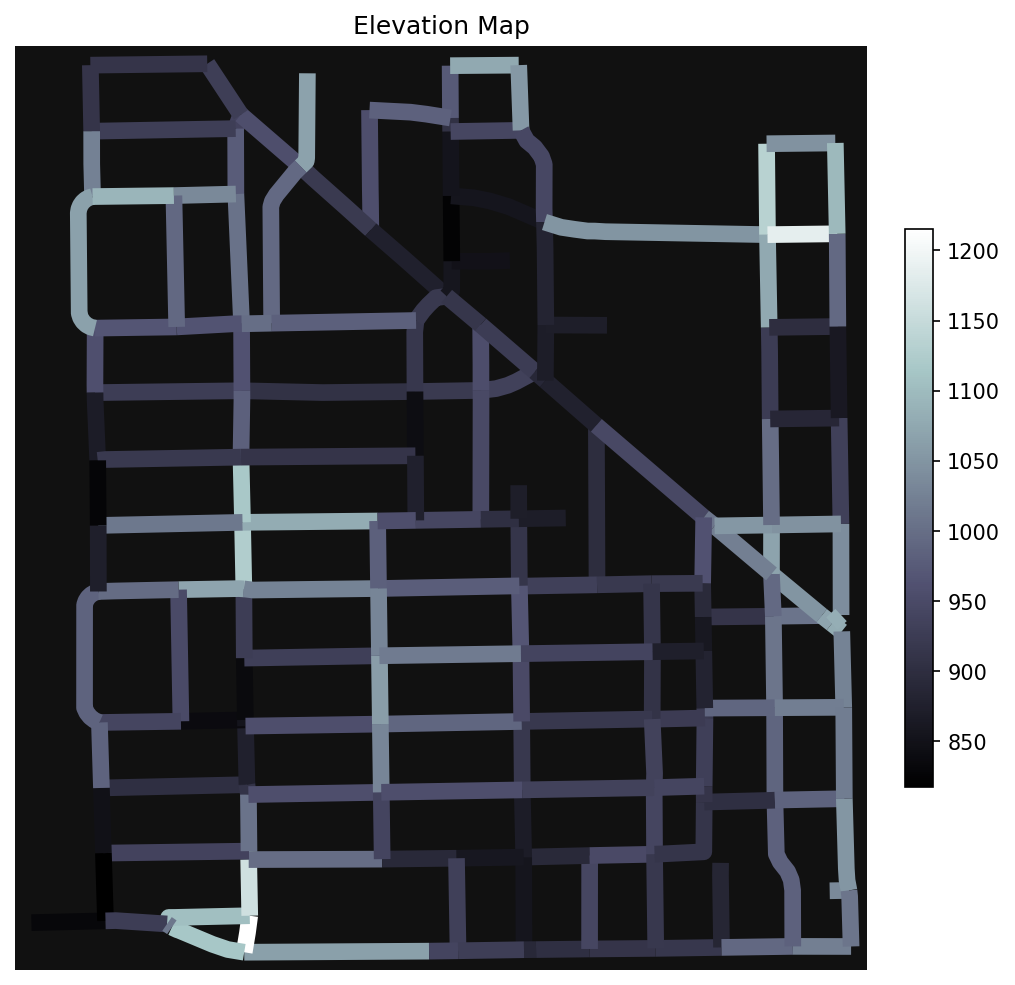

In [215]:
print("An elavation map for our urban area:")
display(Image("./Images/Elevation Map.png",width=400))

### Reading data

In [6]:
train_1 = pd.read_csv('./MLAssignment202324/training_parameters.csv')
test_1 = pd.read_csv('./MLAssignment202324/test_parameters.csv')

### Merging data to reach the final train and test dataframe:<br>
The id columns for heads and tails are not tangible so latitude and longitude are prefered instead. Additionally, altitude column is used as an important feature for our future model.

In [7]:
def create_dataframe(mydata, columns, path_to_area_info):
    new_list = []
    train_temp = mydata.values.tolist()
    edge_info = pd.read_csv('./MLAssignment202324/edge_info.csv').values.tolist()
    for i in tqdm(range(len(mydata))):
        list_area = pd.read_csv(path_to_area_info + str(i) + ".csv").values.tolist()
        for j in range(Edge_Num):
            merged = train_temp[i] + edge_info[j][2:] + list_area[j][2:]
            new_list.append(merged)
    new_df = pd.DataFrame(new_list, columns=columns)
    return new_df

#### Train:

In [8]:
columns = ['SurfaceType',
        'RainfallIntensity',
        'init_max_hour',
        'DrainageSystemCapacity',
        'GreenSpaceRatio',
        'ObservationIndex',
        'longitude',
        'latitude',
        'altitude',
        'flooded_init',
        'flooded_final'
        ]

train_data = create_dataframe(train_1, columns, "MLAssignment202324/training/")

  0%|          | 0/3000 [00:00<?, ?it/s]

In [9]:
train_data.describe(include="all")

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init,flooded_final
count,573000,573000.000000,573000.000000,573000.000000,573000.000000,573000.000000,573000.000000,573000.000000,573000.000000,573000,573000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,150508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562711,479961
mean,NaN,2.157667,4.010667,0.199047,0.200780,1499.500000,-95.381516,29.794657,958.667016,NaN,NaN
std,NaN,36.598613,0.814793,0.057167,0.059035,866.026111,0.002809,0.002673,76.164736,NaN,NaN
min,NaN,-999.000000,3.000000,0.100000,0.100000,0.000000,-95.386469,29.790537,817.500000,NaN,NaN
25%,NaN,2.000000,3.000000,0.150000,0.150000,749.750000,-95.384290,29.792273,908.400000,NaN,NaN
50%,NaN,4.000000,4.000000,0.200000,0.200000,1499.500000,-95.381482,29.794362,942.100000,NaN,NaN
75%,NaN,4.000000,5.000000,0.250000,0.250000,2249.250000,-95.378971,29.796821,1009.400000,NaN,NaN


#### Test:

In [10]:
columns = ['SurfaceType',
        'RainfallIntensity',
        'init_max_hour',
        'DrainageSystemCapacity',
        'GreenSpaceRatio',
        'ObservationIndex',
        'longitude',
        'latitude',
        'altitude',
        'flooded_init'
        ]

test_data = create_dataframe(test_1, columns, "MLAssignment202324/test/")

  0%|          | 0/200 [00:00<?, ?it/s]

In [11]:
test_data.describe(include="all")

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init
count,38200,38200.000000,38200.000000,38200.000000,38200.000000,38200.000000,38200.000000,38200.000000,38200.000000,38200
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,10505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37494
mean,NaN,3.610000,4.010000,0.198300,0.193650,99.500000,-95.381516,29.794657,958.667016,NaN
std,NaN,1.108121,0.780971,0.055652,0.059188,57.735061,0.002809,0.002673,76.165666,NaN
min,NaN,2.000000,3.000000,0.100000,0.100000,0.000000,-95.386469,29.790537,817.500000,NaN
25%,NaN,3.000000,3.000000,0.150000,0.140000,49.750000,-95.384290,29.792273,908.400000,NaN
50%,NaN,4.000000,4.000000,0.200000,0.190000,99.500000,-95.381482,29.794362,942.100000,NaN
75%,NaN,5.000000,5.000000,0.240000,0.250000,149.250000,-95.378971,29.796821,1009.400000,NaN


### Preprocessing

Check for NANs:

In [12]:
train_data.isnull().values.any()

False

In [13]:
test_data.isnull().values.any()

False

Check for outliers:

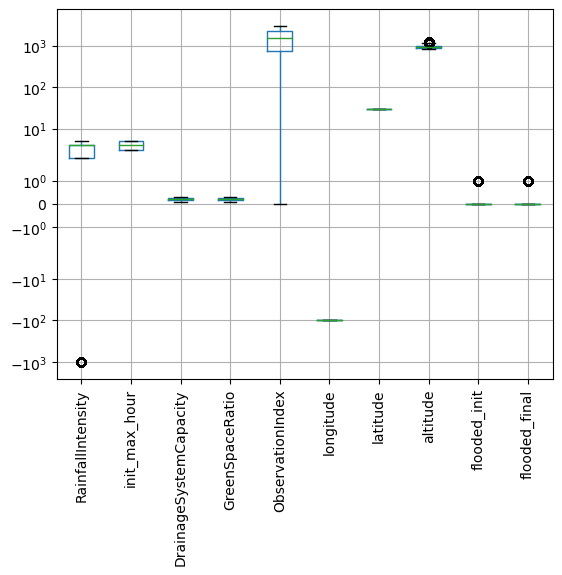

In [14]:
train_data.boxplot(rot=90,)
plt.yscale('symlog')

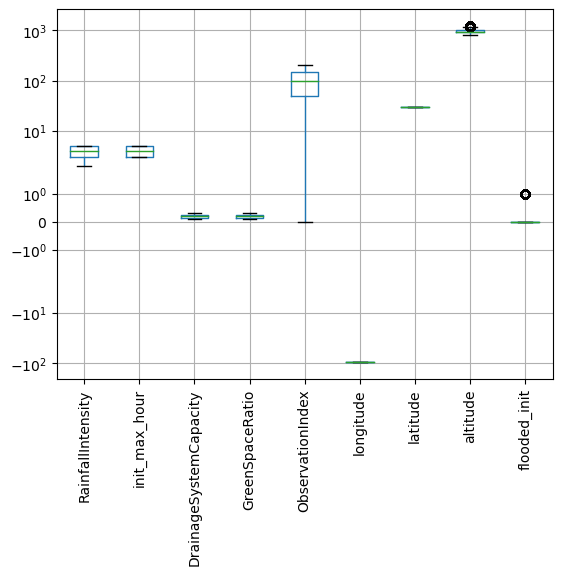

In [15]:
test_data.boxplot(rot=90,)
plt.yscale('symlog')

In the columns head_id and tail_id there is no outlier because the data is similar in all situations. <br>
Also, since flooded_init and flooded_final have categorical variables, they have no outlier. <br>
But it seems that there are some outlier data in "RainfallIntensity" column from training data. So we will try to analyze this column:

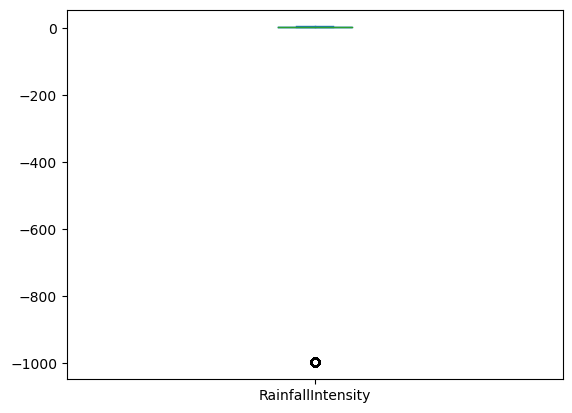

In [16]:
#create a histogram
ax = train_data.plot.box(column="RainfallIntensity")

In [17]:
train_data[train_data["RainfallIntensity"] < -200]

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init,flooded_final
15089,B,-999,3,0.11,0.27,79,-95.382821,29.798740,957.0,False,False
15090,B,-999,3,0.11,0.27,79,-95.383237,29.798445,921.2,False,False
15091,B,-999,3,0.11,0.27,79,-95.382354,29.797764,876.0,False,False
15092,B,-999,3,0.11,0.27,79,-95.380082,29.795224,897.0,False,False
15093,B,-999,3,0.11,0.27,79,-95.380394,29.796295,877.6,False,False
...,...,...,...,...,...,...,...,...,...,...,...
332144,D,-999,4,0.18,0.11,1738,-95.386112,29.795351,828.0,False,False
332145,D,-999,4,0.18,0.11,1738,-95.381934,29.790545,939.5,False,False
332146,D,-999,4,0.18,0.11,1738,-95.382500,29.795060,955.8,False,False
332147,D,-999,4,0.18,0.11,1738,-95.385248,29.790811,1011.0,False,True


Since we have only 764/191 = 4 outliers between 3000 training data, it's better to completely get rid of them:

In [18]:
train_data = train_data[train_data["RainfallIntensity"] > -200]

### Analyzing balance of data:

In [19]:
print(train_data.groupby('flooded_final').size())

flooded_final
False    479330
True      92906
dtype: int64


### Converting Categorical data to numerical:

In [20]:
train_data.head(3)

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init,flooded_final
0,D,5,3,0.11,0.11,0,-95.382821,29.798740,957.0,False,False
1,D,5,3,0.11,0.11,0,-95.383237,29.798445,921.2,False,False
2,D,5,3,0.11,0.11,0,-95.382354,29.797764,876.0,False,False


In [21]:
pd.options.mode.chained_assignment = None

In [22]:
train_data['SurfaceType'] = pd.Categorical(train_data['SurfaceType'])
train_data['flooded_init'] = pd.Categorical(train_data['flooded_init'])
train_data['flooded_final'] = pd.Categorical(train_data['flooded_final'])

print(train_data['SurfaceType'].cat.categories)
print(train_data['flooded_init'].cat.categories)
print(train_data['flooded_final'].cat.categories)

Index(['A', 'B', 'C', 'D'], dtype='object')
Index([False, True], dtype='bool')
Index([False, True], dtype='bool')


In [23]:
train_data['SurfaceType'] = train_data['SurfaceType'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
train_data['flooded_init'] = train_data['flooded_init'].replace([True, False], [1, 0])
train_data['flooded_final'] = train_data['flooded_final'].replace([True, False], [1, 0])
train_data.head(3)

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init,flooded_final
0,4,5,3,0.11,0.11,0,-95.382821,29.798740,957.0,0,0
1,4,5,3,0.11,0.11,0,-95.383237,29.798445,921.2,0,0
2,4,5,3,0.11,0.11,0,-95.382354,29.797764,876.0,0,0


### Normalizing Data:

In [24]:
train_data = train_data.apply(pd.to_numeric)
normalized_train = (train_data-train_data.min())/(train_data.max()-train_data.min())
normalized_train.head(5)

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init,flooded_final
0,1.0,1.0,0.0,0.05,0.05,0.0,0.386032,0.881096,0.350679,0.0,0.0
1,1.0,1.0,0.0,0.05,0.05,0.0,0.342011,0.849409,0.260684,0.0,0.0
2,1.0,1.0,0.0,0.05,0.05,0.0,0.435450,0.776262,0.147059,0.0,0.0
3,1.0,1.0,0.0,0.05,0.05,0.0,0.675873,0.503437,0.199849,0.0,0.0
4,1.0,1.0,0.0,0.05,0.05,0.0,0.642857,0.618475,0.151081,0.0,0.0


### Data Preparation:

In [25]:
X = normalized_train.iloc[:,:-1]
y = normalized_train.iloc[:,-1]

Split data into train and test<br>
we try not to shuffle test data. Because the relation between data is important in final test data visualization

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.25,
                                                    shuffle = False
                                                   )
#Shuffling train_data
idx = np.random.permutation(X_train.index)
X_train = X_train.reindex(idx)
y_train = y_train.reindex(idx)

print(X_train.shape,X_test.shape)

(429177, 10) (143059, 10)


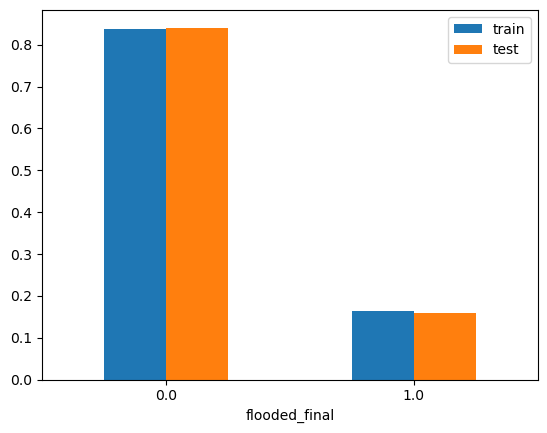

In [27]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

## Implementing Machine Learning models

### KNN:

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn40 = KNeighborsClassifier(n_neighbors=100)
knn40.fit(X_train, y_train)
y_pred = knn40.predict(X_test)

[[117633   2661]
 [ 17794   4971]]


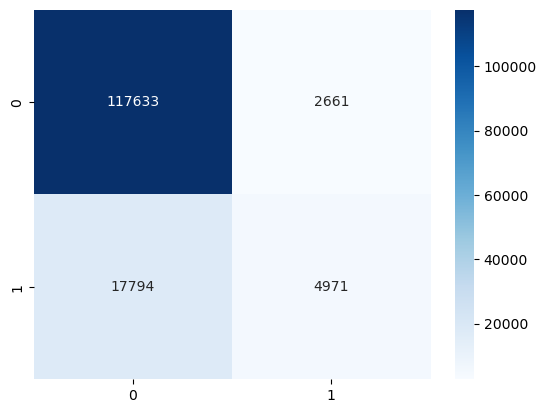

In [29]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

In [30]:
print('***RESULTS ON TEST SET***')
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))
print("precision",metrics.precision_score(y_test, y_pred))
print("F1_score: ",metrics.f1_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
Accuracy 0.8570170349296444
Recall 0.21836151987700417
precision 0.6513364779874213
F1_score:  0.32707175050169424 

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    120294
         1.0       0.65      0.22      0.33     22765

    accuracy                           0.86    143059
   macro avg       0.76      0.60      0.62    143059
weighted avg       0.83      0.86      0.83    143059



### Logistic Regression:

In [31]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

[[119291   1003]
 [ 19185   3580]]


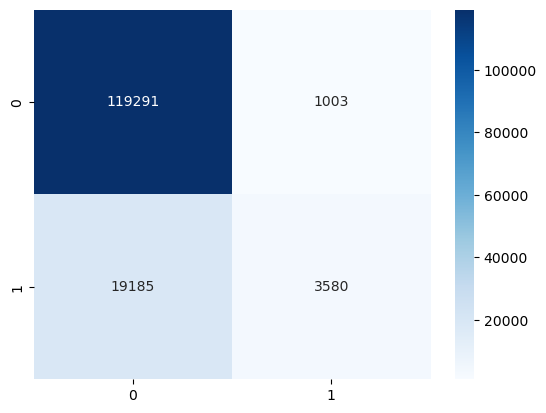

In [32]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues");

In [33]:
print('***RESULTS ON TEST SET***')
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))
print("precision",metrics.precision_score(y_test, y_pred))
print("F1_score: ",metrics.f1_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
Accuracy 0.8588833977589666
Recall 0.157258950142763
precision 0.7811477198341698
F1_score:  0.2618107357027936 

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    120294
         1.0       0.78      0.16      0.26     22765

    accuracy                           0.86    143059
   macro avg       0.82      0.57      0.59    143059
weighted avg       0.85      0.86      0.82    143059



### Decision Tree:

In [271]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
y_pred = DT_Model.predict(X_test)

[[100952  19342]
 [ 13707   9058]]


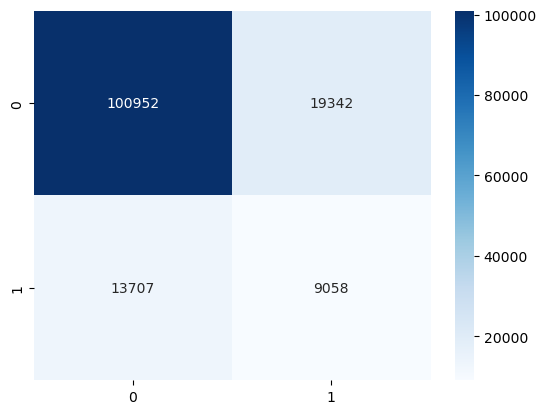

In [272]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

In [273]:
print('***RESULTS ON TEST SET***')
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))
print("precision",metrics.precision_score(y_test, y_pred))
print("F1_score: ",metrics.f1_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
Accuracy 0.7689834264184707
Recall 0.3978915001098177
precision 0.318943661971831
F1_score:  0.35407016515195944 

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86    120294
         1.0       0.32      0.40      0.35     22765

    accuracy                           0.77    143059
   macro avg       0.60      0.62      0.61    143059
weighted avg       0.79      0.77      0.78    143059



### Random Forest:

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(n_estimators=50, bootstrap=False)
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

[[112848   7446]
 [ 15969   6796]]


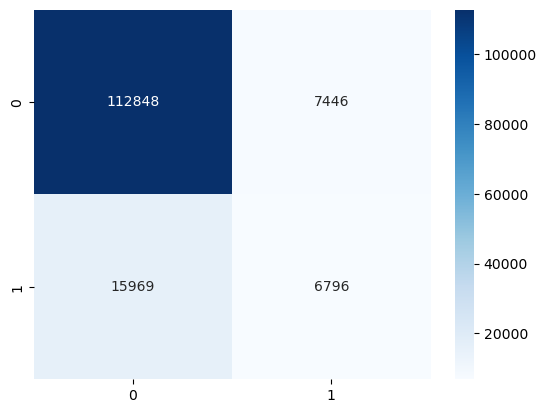

In [38]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

In [39]:
print('***RESULTS ON TEST SET***')
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))
print("precision",metrics.precision_score(y_test, y_pred))
print("F1_score: ",metrics.f1_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

***RESULTS ON TEST SET***
Accuracy 0.8363262709791065
Recall 0.2985284427849769
precision 0.4771801713242522
F1_score:  0.3672818655929959 

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91    120294
         1.0       0.48      0.30      0.37     22765

    accuracy                           0.84    143059
   macro avg       0.68      0.62      0.64    143059
weighted avg       0.81      0.84      0.82    143059



In our problem, the recall and F1 metrics are the most important ones. <br> 
Unfortunatelly, these metrics are not good for our models! The highest one is for Decision Tree which is 39% for recall and 35% for F1.<br>
Therefore, we will go for deep learning models in future!

## Visualize Predictions

In [28]:
def visualize(G, df, filename, plot=False, figsize=(5,5)):
    ec = []
    flooded_init_edges = set([tuple(x) for x in df[df['flooded_init']][['head_id', 'tail_id']].to_numpy()])
    flooded_final_edges = set([tuple(x) for x in df[df['flooded_final']][['head_id', 'tail_id']].to_numpy()])

    for u, v, k in G.edges(keys=True):
        if (u, v) in flooded_init_edges or (v, u) in flooded_init_edges:
            ec.append('slateblue')
        elif (u, v) in flooded_final_edges or (v, u) in flooded_final_edges:
            ec.append('cyan')
        else:
            ec.append('silver')

    fig, ax = ox.plot_graph(G, edge_color=ec, node_size=0, edge_linewidth=5, figsize=figsize, show=plot, close=False) # Generate the plot only if plot or save is True

    # Save the figure only if save is True
    if plot==False: # then save
        plt.savefig(filename, dpi=75, bbox_inches='tight')
        plt.close(fig)

    return (fig, ax) if plot else None   # Return the figure and axis if plot is True, otherwise return None

def dispaly_prediction(pred, X_test, y_test, data_num):
    
    real_df = X_test[(data_num-1)*Edge_Num:data_num*Edge_Num][:]
    real_df["flooded_final"] = y_test[(data_num-1)*Edge_Num:data_num*Edge_Num][:]

    df_real_display = pd.read_csv('./MLAssignment202324/training/0.csv').drop(['flooded_init', 'flooded_final'], axis=1)
    df_real_display["flooded_init"] = real_df["flooded_init"].values.astype(bool)
    df_real_display["flooded_final"] = real_df["flooded_final"].values.astype(bool)
    
    df_pred_display = pd.read_csv('./MLAssignment202324/training/0.csv').drop(['flooded_init', 'flooded_final'], axis=1)
    df_pred_display["flooded_init"] = real_df["flooded_init"].values.astype(bool)
    df_pred_display["flooded_final"] = pred.astype(bool)
    
    print("Real Area:")
    visualize(G, df_real_display, './example.png', plot=True)
    print("Predicted Area:")
    visualize(G, df_pred_display, './example.png', plot=True)
    
G = ox.graph_from_bbox(29.79, 29.80, -95.377, -95.387, network_type='drive')

Real Area:


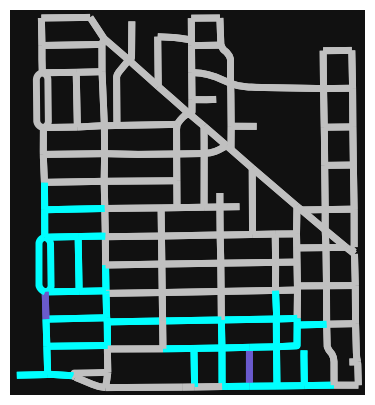

Predicted Area:


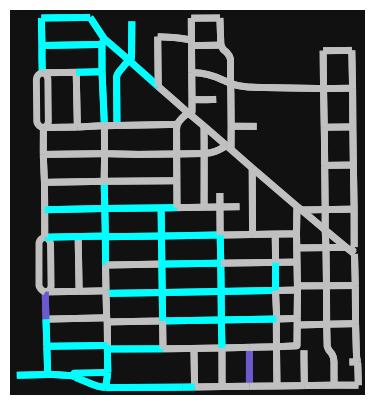

In [275]:
data_num = 4
y_pred = DT_Model.predict(X_test[(data_num-1)*Edge_Num:data_num*Edge_Num][:])
dispaly_prediction(y_pred, X_test, y_test, data_num)

## Implementing Deep Learning Model

#### Multi-Label Classification with Deep Learning

Making data ready for our model:<br>
Since we have 191 edges that contain 5 varying feature for each, one input will be (191, 5). Additionally, we have 5 other features that are constant for all edges. Therefore, we will use only one row for these features as a second input to the model.<br>
> Our final imputs will be 2D matrixes in size ==> (191, 5) and 1D vectors in size ==> (5, )

In [29]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y,
                                                    test_size =0.25,
                                                    shuffle = False
                                                   )

(429177, 10) (143059, 10)


We have 429177/191=2247 Traning Data and 143059/191=749 test data.


In [30]:
def prepare_data_for_one_area(my_data):
    data_1 = my_data[0][:5]
    data_2 = np.delete(my_data, [0,1,2, 3,4], 1)
    return data_1, data_2

def prepare_data_for_MLP(my_data):
    data1 = []
    data2 = []
    for i in range(len(my_data)):
        data1_temp, data2_temp = prepare_data_for_one_area(my_data[i])
        data1.append(data1_temp)
        data2.append(data2_temp)
    return np.array(data1), np.array(data2)

In [31]:
X_train_1, X_train_2 = prepare_data_for_MLP(np.array(np.split(X_train_temp.to_numpy(), 2247)))
y_train = np.array(np.split(y_train_temp.to_numpy(), 2247))
X_test_1, X_test_2 = prepare_data_for_MLP(np.array(np.split(X_test_temp.to_numpy(), 749)))
y_test = np.array(np.split(y_test_temp.to_numpy(), 749))

In [32]:
print("X_train shape:", X_train_1.shape, X_train_2.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_1.shape, X_test_2.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2247, 5) (2247, 191, 5)
y_train shape: (2247, 191)
X_test shape: (749, 5) (749, 191, 5)
y_test shape: (749, 191)


Creating Model:

In [134]:
activation_func = 'relu'

inputA = layers.Input(shape=(191,5))
inputB = layers.Input(shape=(5,))

# the first branch operates on the first input
x = layers.Flatten()(inputA)
x = layers.Dense(512, activation=activation_func)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation=activation_func)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation=activation_func)(x)
x = Model(inputs=inputA, outputs=x)

# the second branch opreates on the second input
y = layers.Dense(64, activation=activation_func)(inputB)
y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = layers.concatenate([x.output, y.output])

z = layers.Dense(512, activation=activation_func)(combined)
z = layers.Dropout(0.2)(z)
z = layers.Dense(256, activation=activation_func)(z)
z = layers.BatchNormalization()(z)
z = layers.Dense(128, activation=activation_func)(z)
z = layers.Dense(191, activation="sigmoid")(z)

model = Model(inputs=[y.input, x.input], outputs=z)
print(model.summary())

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_35 (InputLayer)       [(None, 191, 5)]             0         []                            
                                                                                                  
 flatten_17 (Flatten)        (None, 955)                  0         ['input_35[0][0]']            
                                                                                                  
 dense_133 (Dense)           (None, 512)                  489472    ['flatten_17[0][0]']          
                                                                                                  
 batch_normalization_35 (Ba  (None, 512)                  2048      ['dense_133[0][0]']           
 tchNormalization)                                                                         

Model Structure:


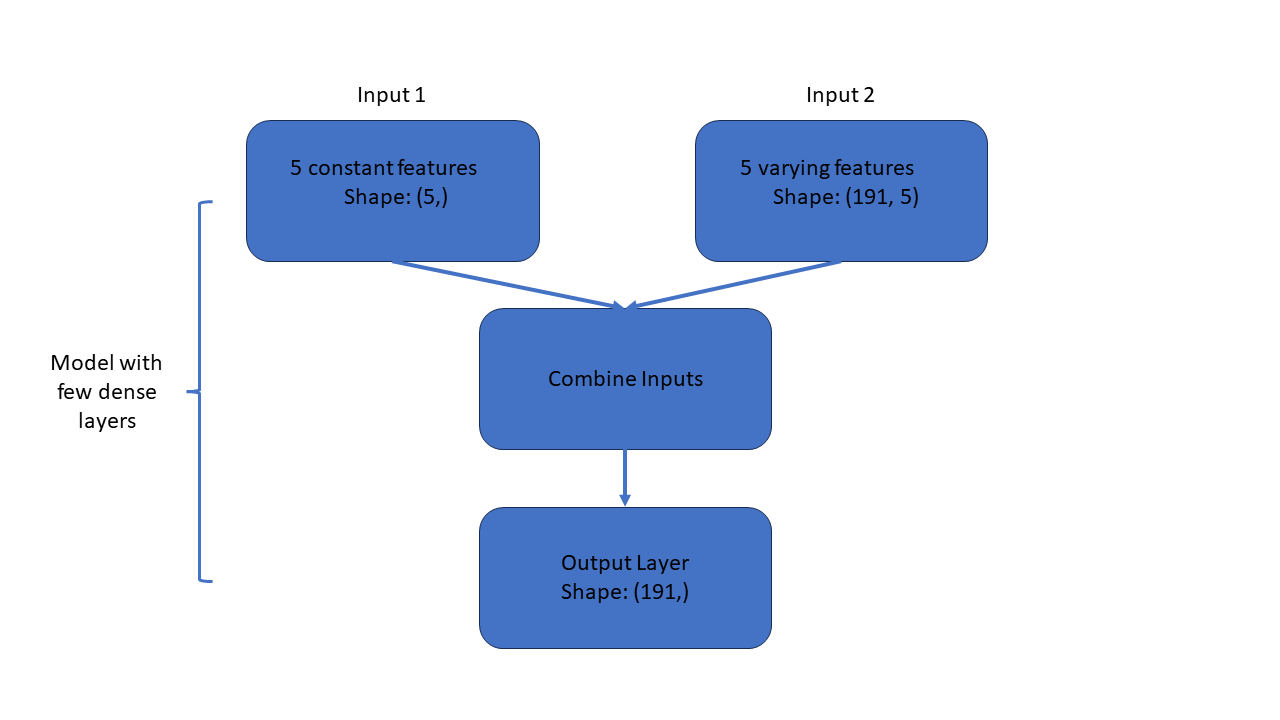

In [214]:
print("Model Structure:")
display(Image("./Images/DL Model.png", width=1000))

Compile and train model:

In [136]:
Learning_Rate = 0.001
BATCH_SIZE = 16
EPOCHS = 200

loss_func = 'binary_crossentropy'
optimizer_func = keras.optimizers.Adam(learning_rate=Learning_Rate)
model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['accuracy']
             )

checkpoint_cb = keras.callbacks.ModelCheckpoint("MLC.keras", save_best_only=False)

trainedModel = model.fit([X_train_1, X_train_2], y_train, 
                         verbose = 1,
                         callbacks = [checkpoint_cb],
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_split = 0.15)

Epoch 1/200
120/120 [==============================] - 5s 18ms/step - loss: 0.4620 - accuracy: 0.0031 - val_loss: 0.4383 - val_accuracy: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 2s 15ms/step - loss: 0.4013 - accuracy: 0.0031 - val_loss: 0.3797 - val_accuracy: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 2s 14ms/step - loss: 0.3970 - accuracy: 0.0031 - val_loss: 0.3918 - val_accuracy: 0.0000e+00
Epoch 4/200
120/120 [==============================] - 2s 14ms/step - loss: 0.3913 - accuracy: 0.0031 - val_loss: 0.3866 - val_accuracy: 0.0089
Epoch 5/200
120/120 [==============================] - 2s 14ms/step - loss: 0.3773 - accuracy: 0.0052 - val_loss: 0.3767 - val_accuracy: 0.0000e+00
Epoch 6/200
120/120 [==============================] - 2s 14ms/step - loss: 0.3612 - accuracy: 0.0094 - val_loss: 0.3638 - val_accuracy: 0.0059
Epoch 7/200
120/120 [==============================] - 2s 14ms/step - loss: 0.3449 - accuracy: 0.0105 - val_loss: 0.6035

In [138]:
model = tf.keras.models.load_model('./MLC.keras')
y_pred = model.predict([X_test_1, X_test_2]).round()

24/24 [==============================] - 0s 5ms/step


### Evaluatng model:<br>
In this case, we would have different metrics to evaluate the algorithms and also to match to our previous classic models. <br> 
Because multi-label prediction has an additional notion of being partially correct!

In [130]:
def my_accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        for j in range(y_true.shape[1]):
            if y_true[i][j]==y_pred[i][j]:
                temp +=1
    return temp / (y_true.shape[0]*y_true.shape[1])

def my_recall(y_true, y_pred):
    TP = 0
    FN = 0
    for i in range(y_true.shape[0]):
        for j in range(y_true.shape[1]):
            if y_true[i][j]==y_pred[i][j] and y_pred[i][j]==1:
                TP+=1
            if y_true[i][j]==1 and y_pred[i][j]==0:
                FN+=1
    return TP/(TP+FN)

def my_f1(y_true, y_pred):
    TP = 0
    FN = 0
    FP = 0
    for i in range(y_true.shape[0]):
        for j in range(y_true.shape[1]):
            if y_true[i][j]==y_pred[i][j] and y_pred[i][j]==1:
                TP+=1
            if y_true[i][j]==1 and y_pred[i][j]==0:
                FN+=1
            if y_true[i][j]==0 and y_pred[i][j]==1:
                FP+=1
                
    return TP/(TP+(FP+FN)/2)

In [140]:
print("accuracy: ", my_accuracy(y_test, y_pred))
print("recall: ", my_recall(y_test, y_pred))
print("f1: ", my_f1(y_test, y_pred))

accuracy:  0.9118755198903948
recall:  0.6838567977157918
f1:  0.7117938870219235


As it can be seen, results are surprisingly improved!

Visualizaiton:

Real Area:


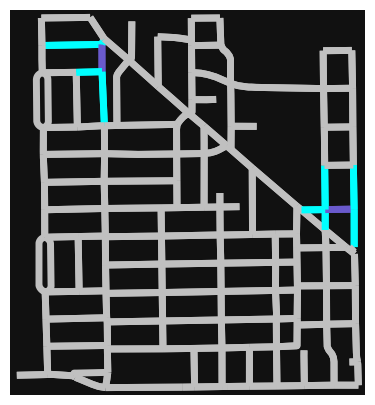

Predicted Area:


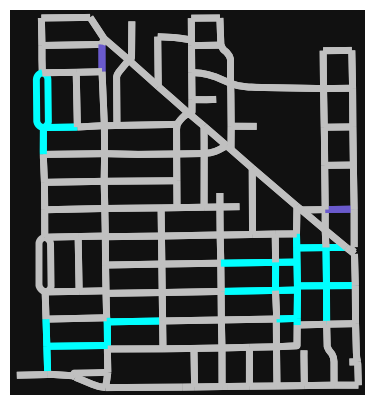

In [144]:
data_num = 24
y_pred_ = y_pred[data_num]
dispaly_prediction(y_pred_, X_test_temp, y_test_temp, data_num)

It can even be seen that final flooded edges are predicted a little bit better than before!

## Saving model

Since the model in trained by tensorflow, I saved it with a method provided in this framework which is model.save()<br>
It is saved as MLC.keras and can be loaded with this command:<br>
> model = tf.keras.models.load_model('path to MLC.keras file')

## Predicting unseen data using the best model

In [209]:
test_data

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init
0,4,4,4,0.22,0.28,0,-95.382821,29.798740,957.0,1
1,4,4,4,0.22,0.28,0,-95.383237,29.798445,921.2,0
2,4,4,4,0.22,0.28,0,-95.382354,29.797764,876.0,0
3,4,4,4,0.22,0.28,0,-95.380082,29.795224,897.0,0
4,4,4,4,0.22,0.28,0,-95.380394,29.796295,877.6,0
...,...,...,...,...,...,...,...,...,...,...
38195,3,2,4,0.11,0.15,199,-95.386112,29.795351,828.0,0
38196,3,2,4,0.11,0.15,199,-95.381934,29.790545,939.5,0
38197,3,2,4,0.11,0.15,199,-95.382500,29.795060,955.8,0
38198,3,2,4,0.11,0.15,199,-95.385248,29.790811,1011.0,0


Checking categorical data in test set:

In [148]:
test_data['SurfaceType'] = pd.Categorical(test_data['SurfaceType'])
test_data['flooded_init'] = pd.Categorical(test_data['flooded_init'])

print(test_data['SurfaceType'].cat.categories)
print(test_data['flooded_init'].cat.categories)

Index(['A', 'B', 'C', 'D'], dtype='object')
Index([False, True], dtype='bool')


Converting categorical data to numerical:

In [150]:
test_data['SurfaceType'] = test_data['SurfaceType'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
test_data['flooded_init'] = test_data['flooded_init'].replace([True, False], [1, 0])
test_data.head(3)

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init
0,4,4,4,0.22,0.28,0,-95.382821,29.798740,957.0,1
1,4,4,4,0.22,0.28,0,-95.383237,29.798445,921.2,0
2,4,4,4,0.22,0.28,0,-95.382354,29.797764,876.0,0


Normalizing data:

In [160]:
test_data = test_data.apply(pd.to_numeric)
normalized_test = (test_data-test_data.min())/(test_data.max()-test_data.min())
normalized_test.head(3)

,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,ObservationIndex,longitude,latitude,altitude,flooded_init
0,1.0,0.666667,0.5,0.6,0.9,0.0,0.386032,0.881096,0.350679,1.0
1,1.0,0.666667,0.5,0.6,0.9,0.0,0.342011,0.849409,0.260684,0.0
2,1.0,0.666667,0.5,0.6,0.9,0.0,0.435450,0.776262,0.147059,0.0


Getting the data ready to feed to model:

In [168]:
X_test_1, X_test_2 = prepare_data_for_MLP(np.array(np.split(normalized_test.to_numpy(), normalized_test.shape[0]/Edge_Num)))

Predicting:

In [176]:
y_pred_test = model.predict([X_test_1, X_test_2]).round()
y_pred_test.shape

7/7 [==============================] - 0s 5ms/step


(200, 191)

Now we just need to add every 191 predicted value to all 200 test folder's csv files.<br><br>


Adding predictions to csv files and saving them:

In [207]:
def add_column_to_csv(column, column_name, file_path ,save_path):
    df = pd.read_csv(file_path)
    df[column_name] = column
    df[column_name] = df[column_name].astype(bool)
    df.to_csv(save_path, index=False)
    
for i in range(y_pred_test.shape[0]):
    save_path = "./MLAssignment202324/Predicted_Test/" + str(i) + '.csv'
    file_path = "./MLAssignment202324/test/" + str(i) + '.csv'
    add_column_to_csv(y_pred_test[i], "flooded_final", file_path , save_path)